_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
#!pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [4]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [5]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [6]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [7]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [8]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [15]:
#
df = income.merge(lifespan).merge(population)

In [16]:
df = df.merge(entities[['country','name', 'world_6region']], left_on='geo', right_on='country')
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [17]:
df = df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region',
    'life_expectancy_years': 'lifespan'
})

In [18]:
df.tail()

,year,income,lifespan,population,country,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


## Explore data

In [19]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [20]:
df[df['year']== 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [21]:
df[df['year']== 1918].skew()

year          0.000000
income        2.161759
lifespan      0.815414
population    9.000622
dtype: float64

In [22]:
df[df['year']== 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [23]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Eritrea,europe_central_asia
freq,219,10778


In [24]:
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


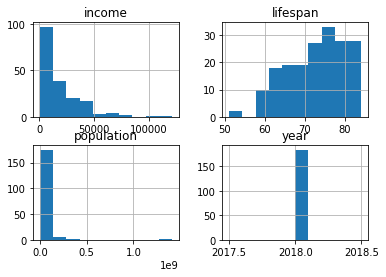

In [25]:
now = df[df['year']==2018]
now.hist();


/home/richmond/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/home/richmond/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/home/richmond/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/home/richmond/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  

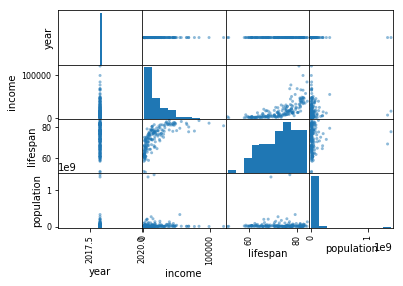

In [26]:
pd.plotting.scatter_matrix(now);

In [27]:
now['log_income'] = np.log(now['income'])

/home/richmond/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


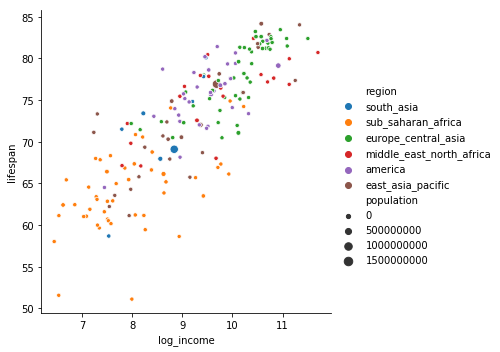

In [28]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=now);

In [29]:
now

,year,income,lifespan,population,country,region,log_income
218,2018,1867,58.69,36373176,Afghanistan,south_asia,7.532088
437,2018,5846,65.19,30774205,Angola,sub_saharan_africa,8.673513
656,2018,12424,78.01,2934363,Albania,europe_central_asia,9.427385
922,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa,11.130654
1141,2018,18942,76.97,44688864,Argentina,america,9.849137
1360,2018,8662,75.97,2934152,Armenia,europe_central_asia,9.066701
1579,2018,21035,77.60,103050,Antigua and Barbuda,america,9.953943
1798,2018,45783,82.87,24772247,Australia,east_asia_pacific,10.731668
2017,2018,44645,81.84,8751820,Austria,europe_central_asia,10.706498
2236,2018,16552,72.30,9923914,Azerbaijan,europe_central_asia,9.714262


## Plot visualization

## Analyze outliers

In [30]:
now[now['income']>8000].sort_values(by='income')

,year,income,lifespan,population,country,region,log_income
32552,2018,8293,75.75,6411558,El Salvador,america,9.023167
37808,2018,8327,72.29,44009214,Ukraine,europe_central_asia,9.027259
18489,2018,8452,76.65,9903802,Jordan,middle_east_north_africa,9.042158
18270,2018,8517,75.18,2898677,Jamaica,america,9.049819
1360,2018,8662,75.97,2934152,Armenia,europe_central_asia,9.066701
29924,2018,9279,74.78,6896908,Paraguay,america,9.135509
12357,2018,9422,65.75,912241,Fiji,east_asia_pacific,9.150803
5740,2018,9929,74.83,817054,Bhutan,south_asia,9.203215
13452,2018,10062,74.31,3907131,Georgia,europe_central_asia,9.216521
10824,2018,10209,78.31,16863425,Ecuador,america,9.231025


In [31]:
now[now['income'] > 80000].sort_values(by='income')

,year,income,lifespan,population,country,region,log_income
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa,11.703819


In [32]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar['income'].values[0]
qatar_lifespan = qatar['lifespan'].values[0]
print(qatar_income, qatar_lifespan)

121033 80.71


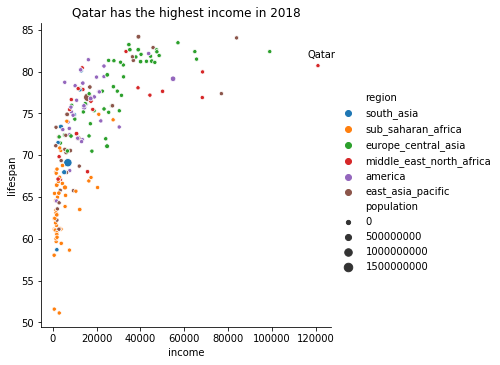

In [33]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now)
plt.text(x=qatar_income - 5000, y=qatar_lifespan + 1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

## Plot multiple years

In [34]:
years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]
centuries.describe()

,year,income,lifespan,population
count,552.000000,552.000000,552.000000,5.520000e+02
mean,1918.000000,6972.963768,42.402736,1.895547e+07
std,81.723717,13745.461356,23.146963,9.202077e+07
min,1818.000000,351.000000,1.090000,2.207000e+03
25%,1818.000000,854.250000,25.982500,4.440450e+05
50%,1918.000000,1476.500000,32.800000,2.167896e+06
75%,2018.000000,5311.250000,67.110000,9.425904e+06
max,2018.000000,121033.000000,84.170000,1.415046e+09


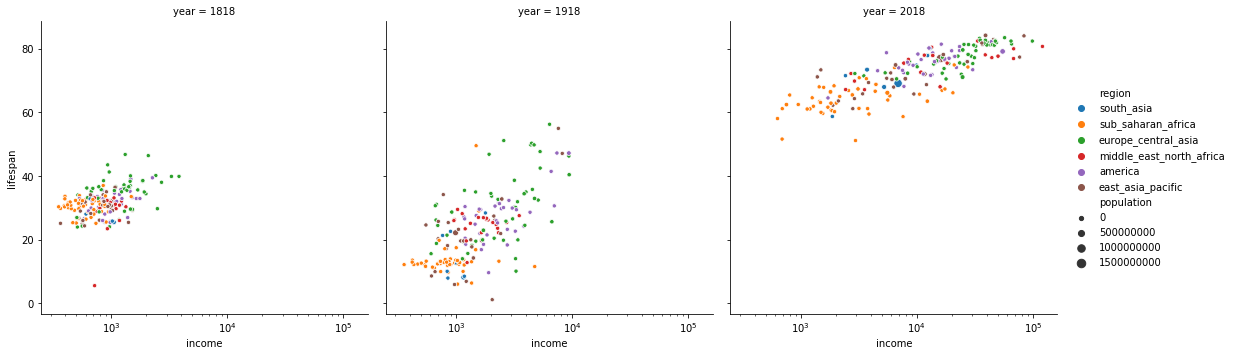

In [35]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            col='year', data=centuries)
plt.xscale('log');

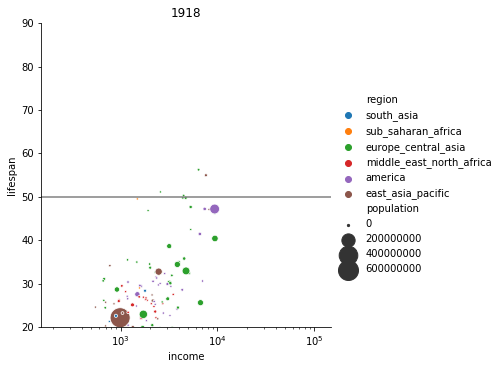

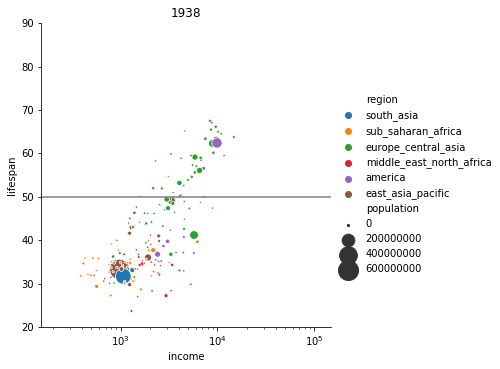

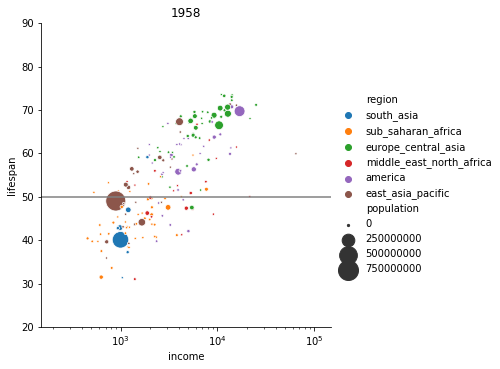

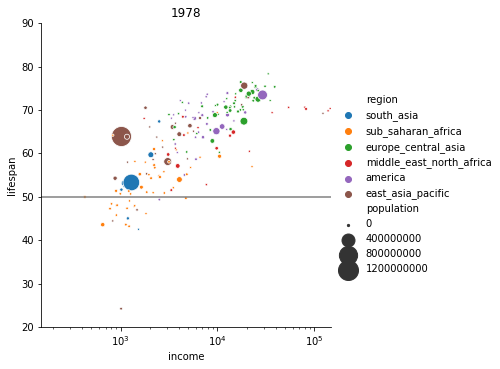

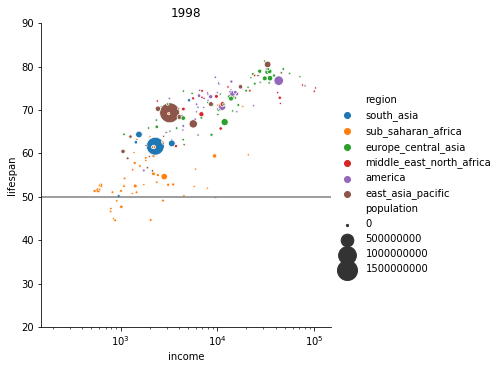

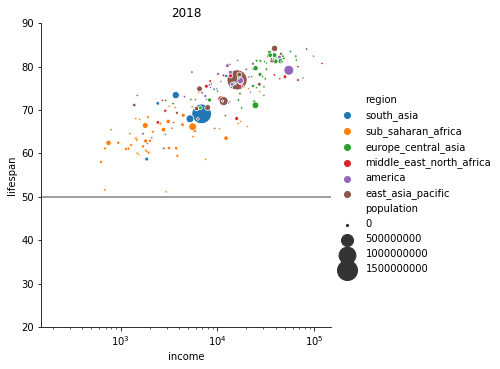

In [36]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population',
              sizes=(5, 400), data=df[df['year'] == year])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey')

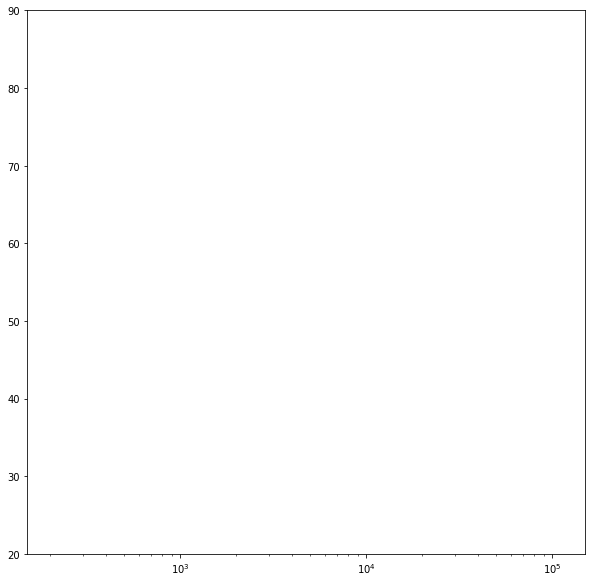

In [69]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['figure.figsize'] = [10, 10]

plt.rcParams['figure.max_open_warning'] = 200


fig,ax = plt.subplots()


def init():
    
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
   

def animate(i):
    if(i<=39):
        incr = i*5
    else:
      #slow down
        incr = (40*5)+(40-i) 
    
    year = 1800+incr
    ax.clear()
    top_10_pop = df[df['year']==year].sort_values(by='population', ascending=False).head(10)
   
    ax.set_xscale('log')
    ax.set_xlim((150, 150000))
    ax.set_ylim((20, 90))
    for index,row in top_10_pop.iterrows():
      country = row['country']
      y = row['lifespan']
      x = row['income']
      ax.text(x=x-10, y=y+1, s=country, color='red')

    plt.axhline(y=50, color='grey')
    sns.relplot(x='income', y='lifespan', hue='region', size='population',
              sizes=(5, 1500), data=df[df['year'] == year],ax=ax)
    
    ax.set_title(year)
    
   

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=600)



<IPython.core.display.Javascript object>


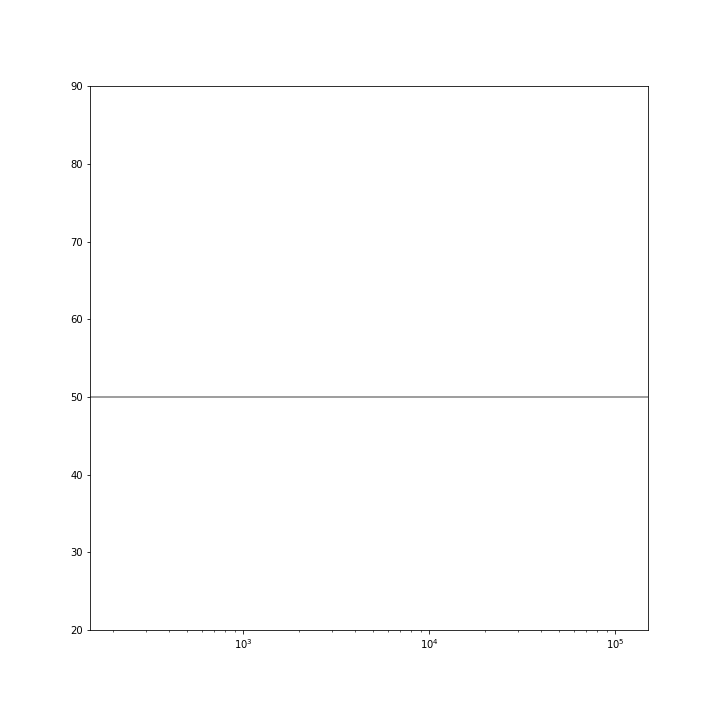

<IPython.core.display.Javascript object>


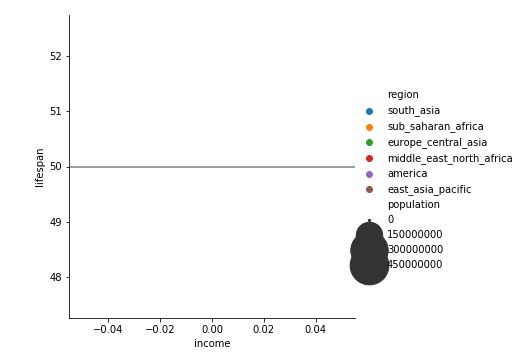

<IPython.core.display.Javascript object>


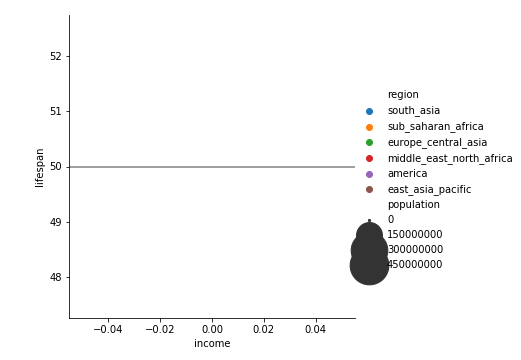

<IPython.core.display.Javascript object>


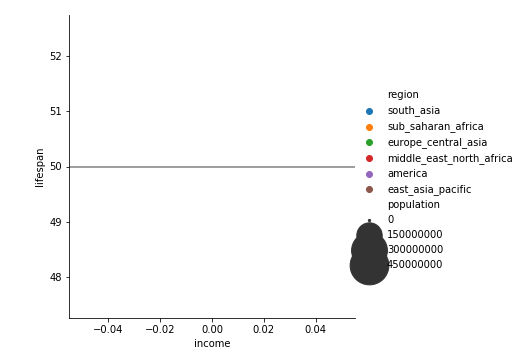

<IPython.core.display.Javascript object>


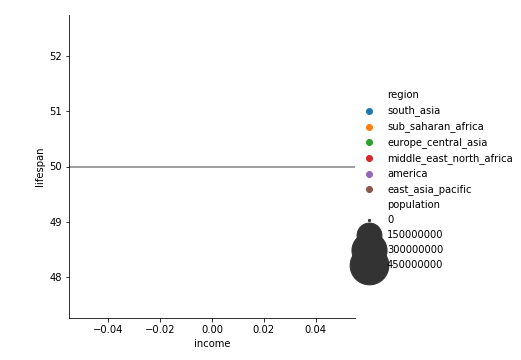

<IPython.core.display.Javascript object>


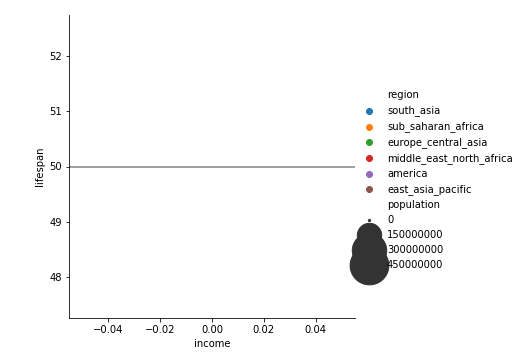

<IPython.core.display.Javascript object>


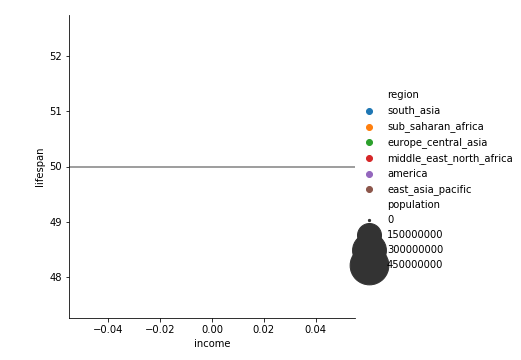

<IPython.core.display.Javascript object>


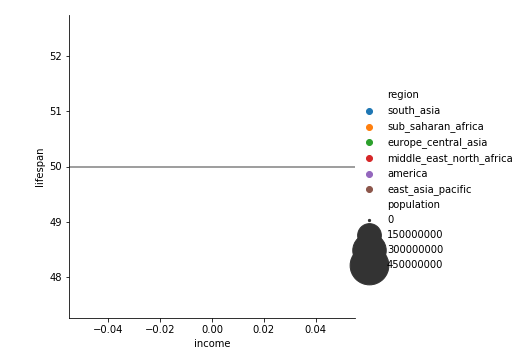

<IPython.core.display.Javascript object>


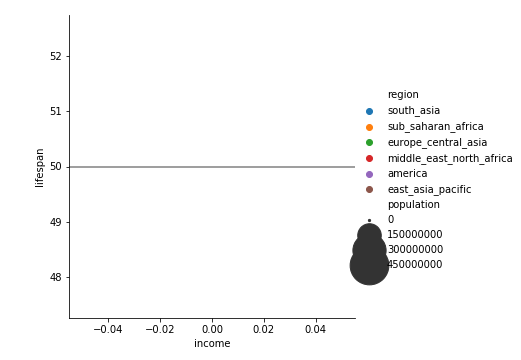

<IPython.core.display.Javascript object>


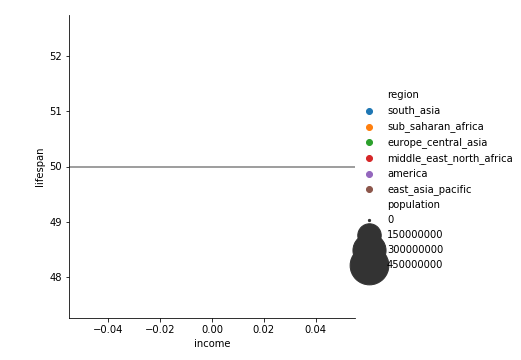

<IPython.core.display.Javascript object>


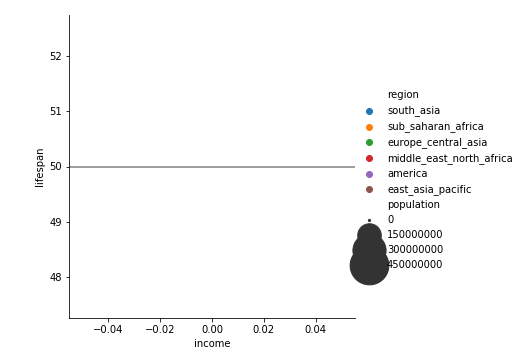

<IPython.core.display.Javascript object>


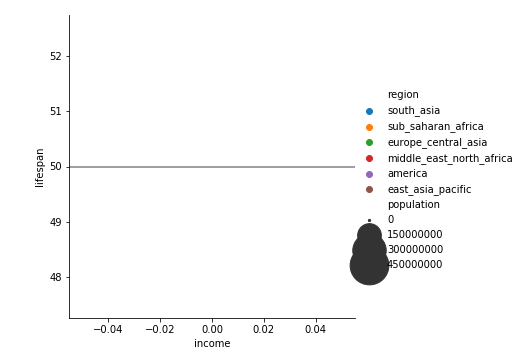

<IPython.core.display.Javascript object>


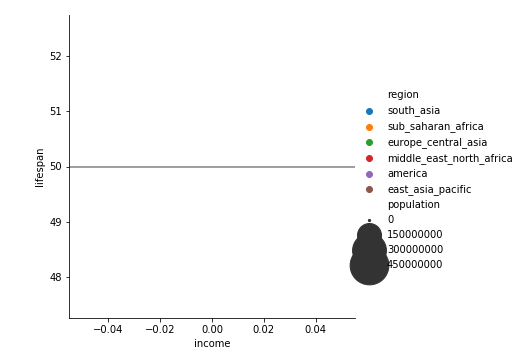

<IPython.core.display.Javascript object>


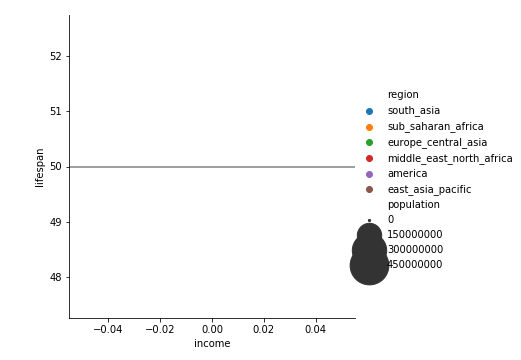

<IPython.core.display.Javascript object>


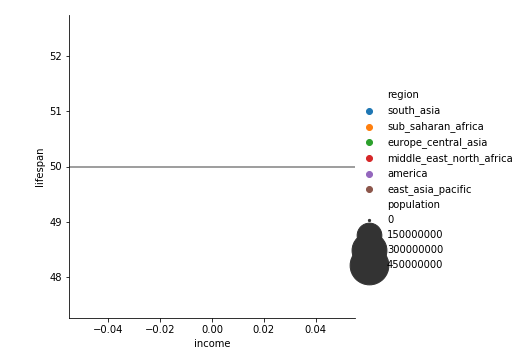

<IPython.core.display.Javascript object>


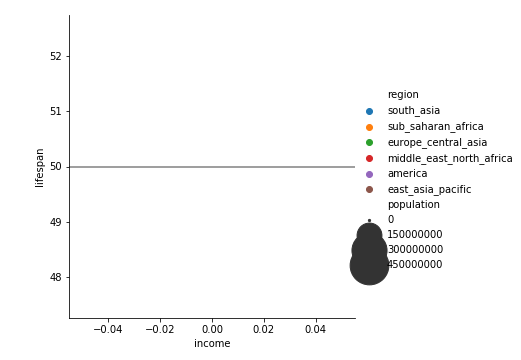

<IPython.core.display.Javascript object>


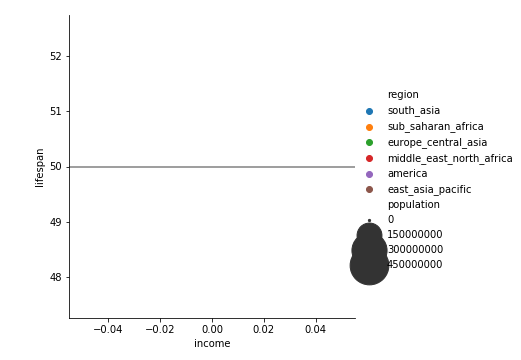

<IPython.core.display.Javascript object>


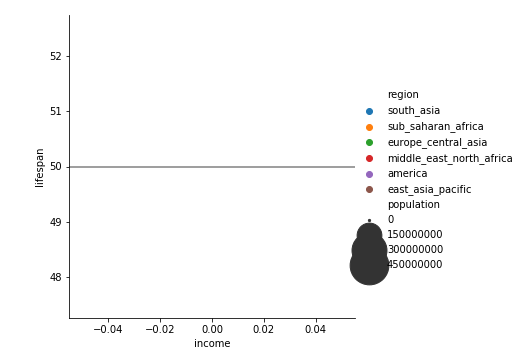

<IPython.core.display.Javascript object>


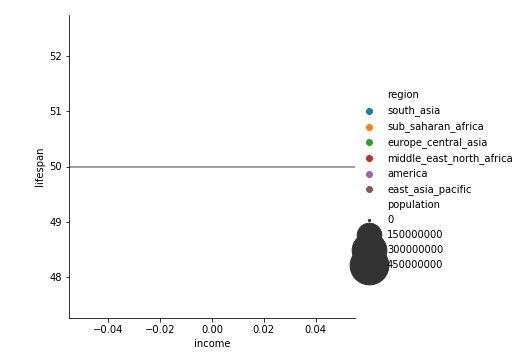

<IPython.core.display.Javascript object>


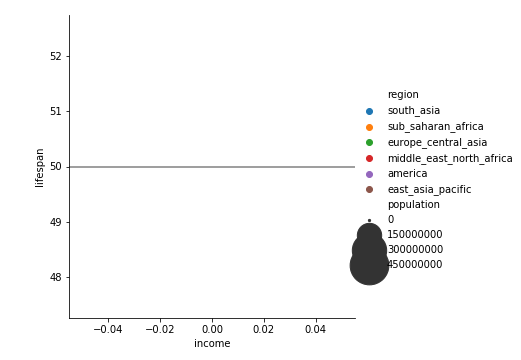

<IPython.core.display.Javascript object>


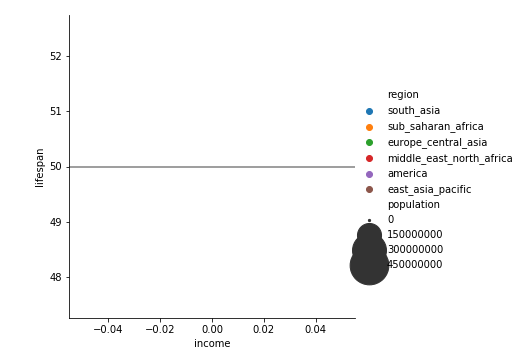

<IPython.core.display.Javascript object>


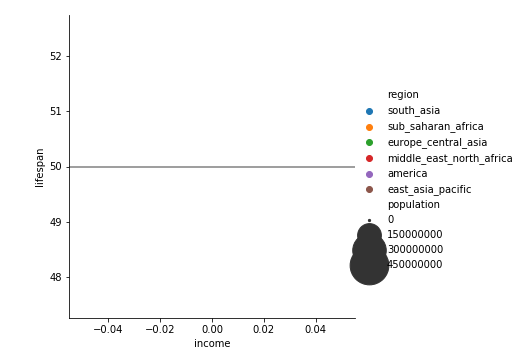

<IPython.core.display.Javascript object>


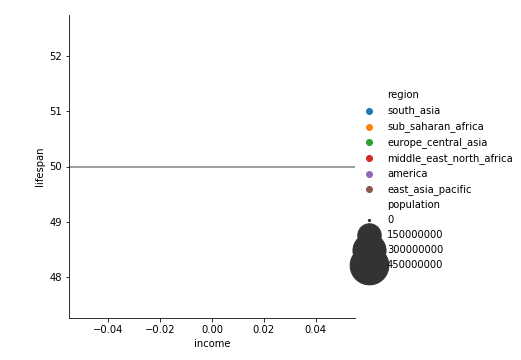

<IPython.core.display.Javascript object>


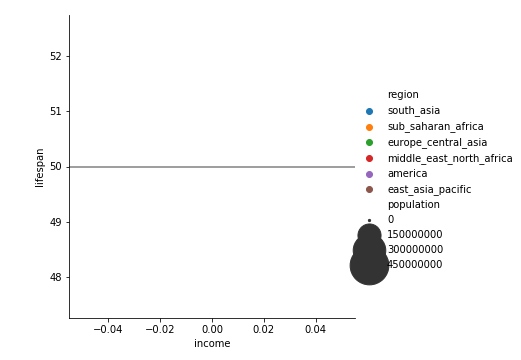

<IPython.core.display.Javascript object>


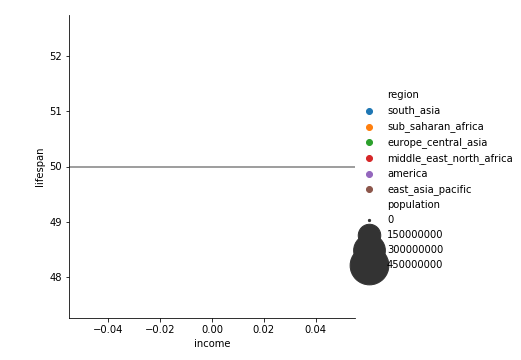

<IPython.core.display.Javascript object>


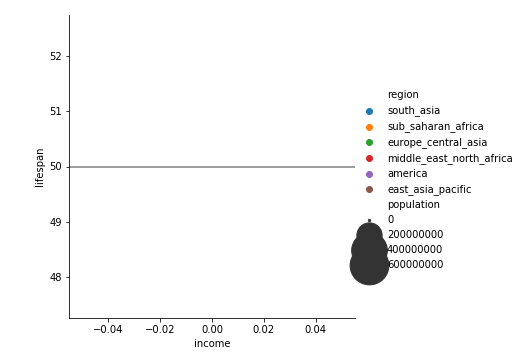

<IPython.core.display.Javascript object>


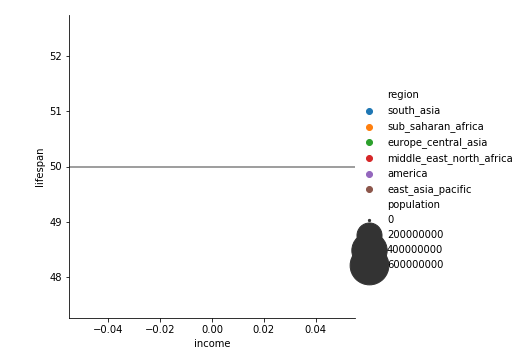

<IPython.core.display.Javascript object>


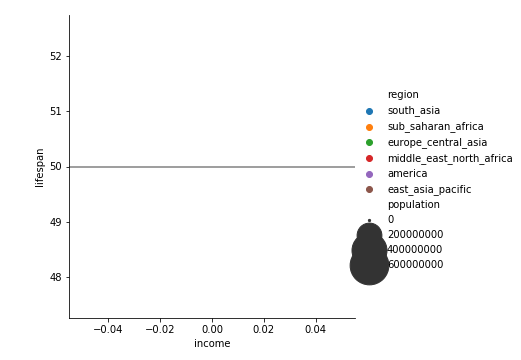

<IPython.core.display.Javascript object>


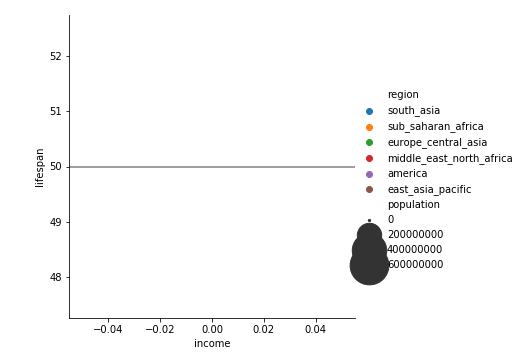

<IPython.core.display.Javascript object>


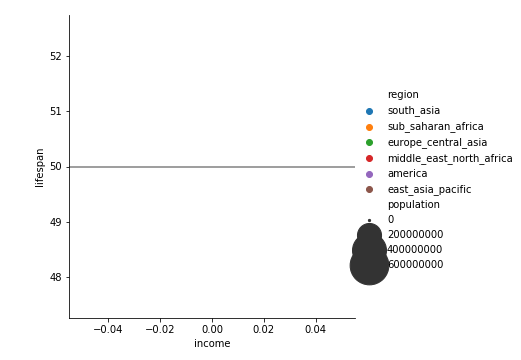

<IPython.core.display.Javascript object>


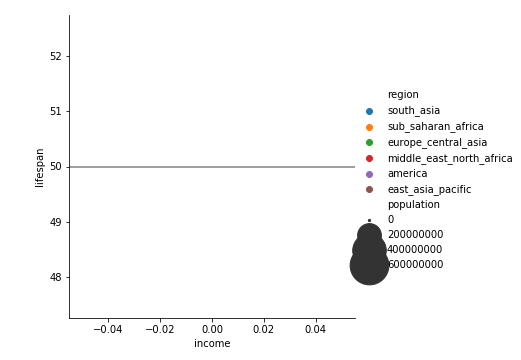

<IPython.core.display.Javascript object>


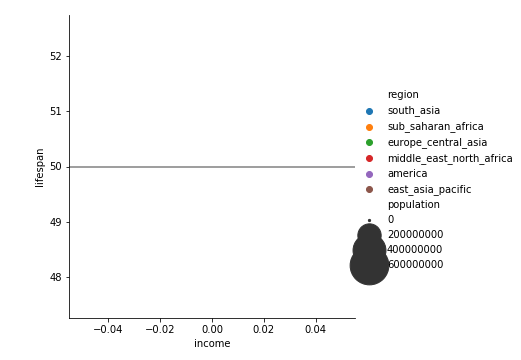

<IPython.core.display.Javascript object>


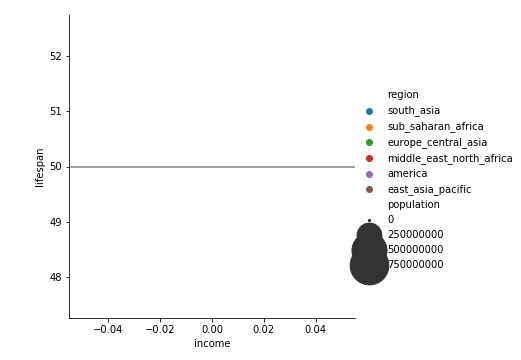

<IPython.core.display.Javascript object>


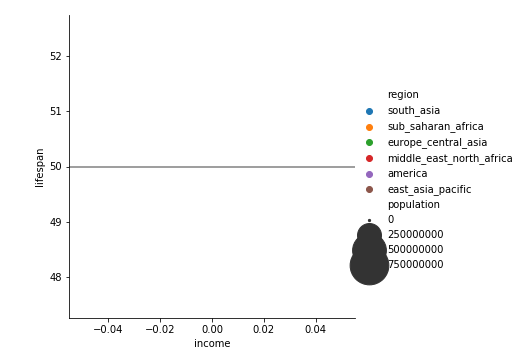

<IPython.core.display.Javascript object>


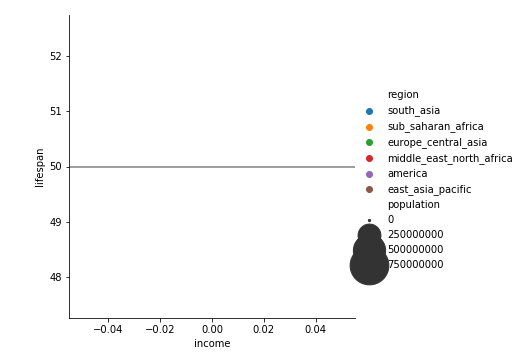

<IPython.core.display.Javascript object>


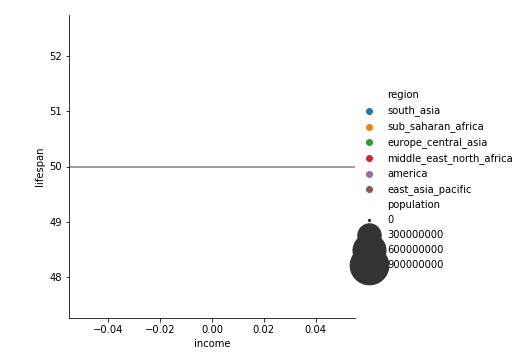

<IPython.core.display.Javascript object>


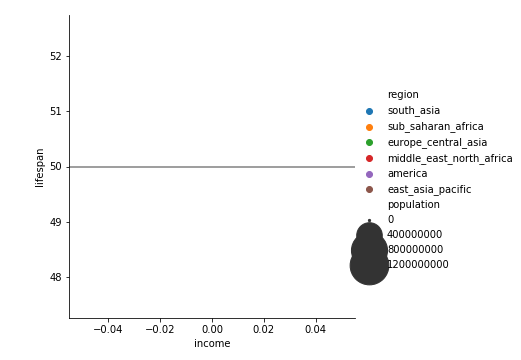

<IPython.core.display.Javascript object>


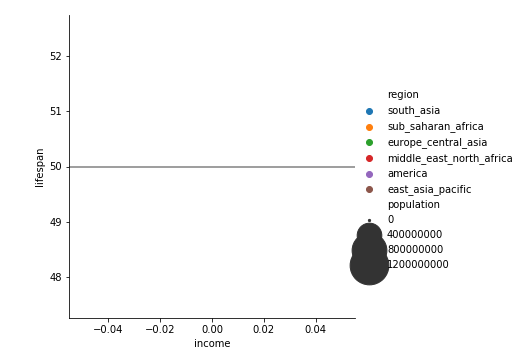

<IPython.core.display.Javascript object>


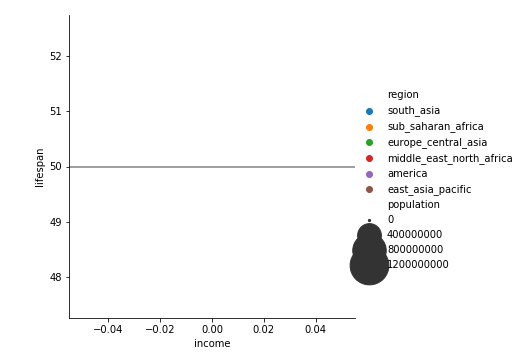

<IPython.core.display.Javascript object>


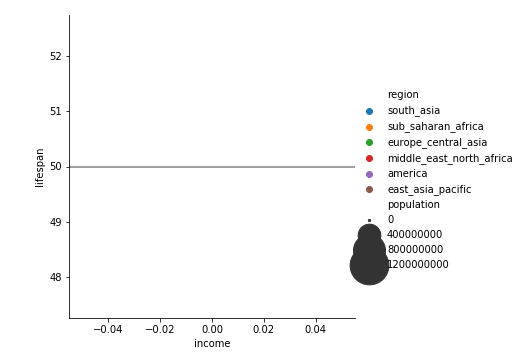

<IPython.core.display.Javascript object>


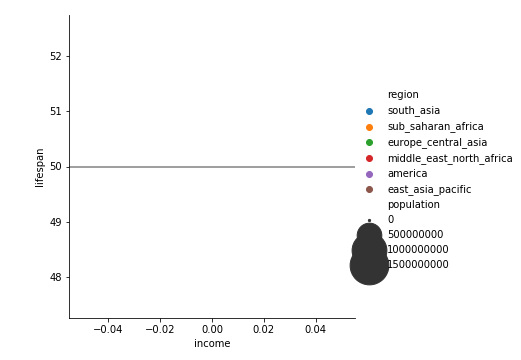

<IPython.core.display.Javascript object>


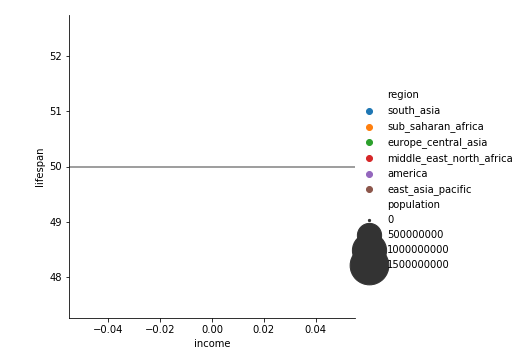

<IPython.core.display.Javascript object>


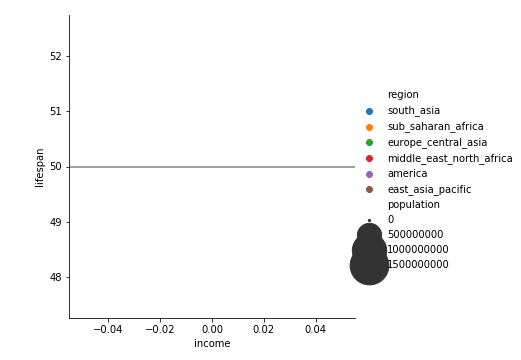

<IPython.core.display.Javascript object>


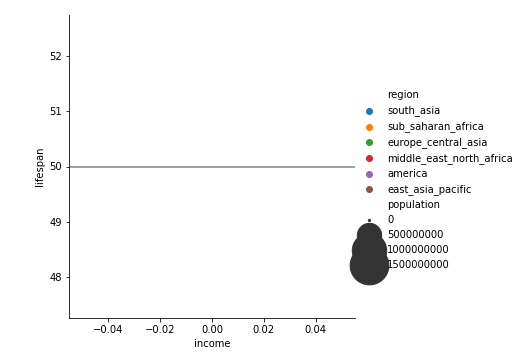

<IPython.core.display.Javascript object>


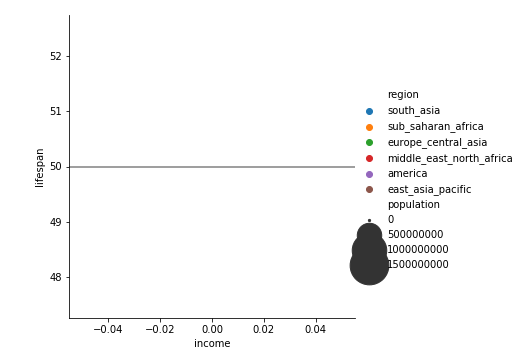

<IPython.core.display.Javascript object>


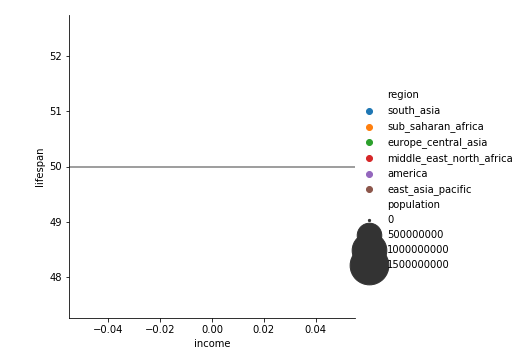

<IPython.core.display.Javascript object>


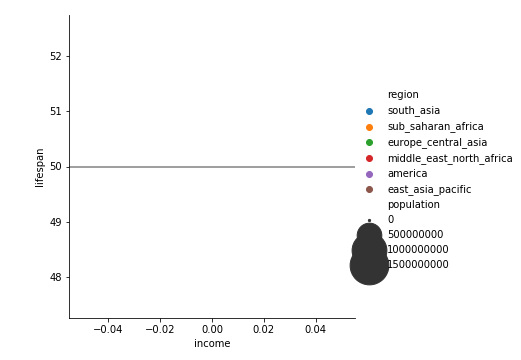

<IPython.core.display.Javascript object>


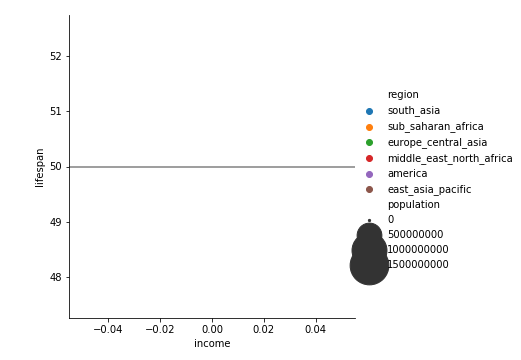

<IPython.core.display.Javascript object>


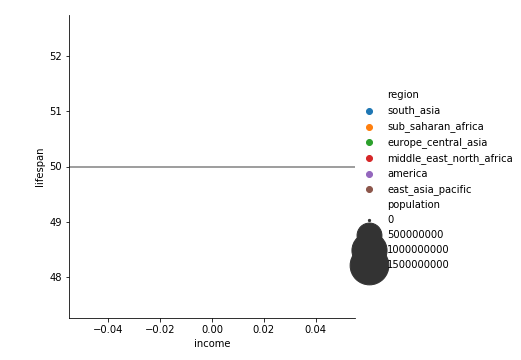

<IPython.core.display.Javascript object>


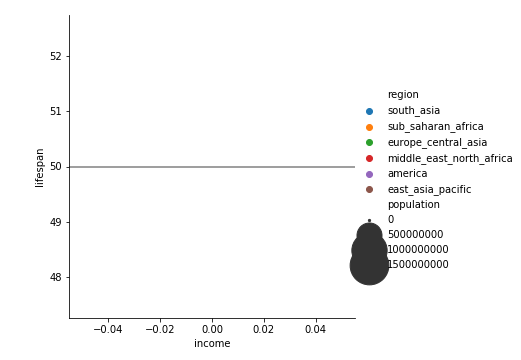

<IPython.core.display.Javascript object>


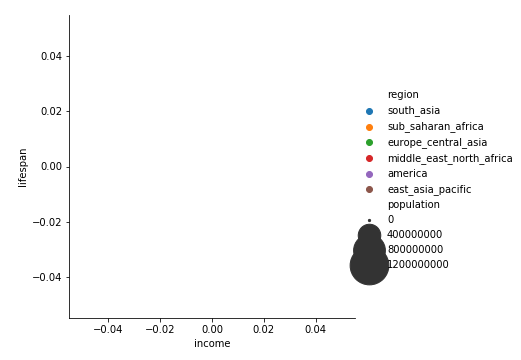

In [70]:
%matplotlib notebook
HTML(anim.to_html5_video())
plt.rcParams['figure.max_open_warning'] = 25

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project